<a href="https://colab.research.google.com/github/WilsonG08/redNeuronalConvolucional/blob/main/redNeuronalConvolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Librerias
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential


(60000, 28, 28)
Epoch 1/5
469/469 [==============================] - 6s 7ms/step - loss: 0.2564 - accuracy: 0.9276
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0811 - accuracy: 0.9767
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0546 - accuracy: 0.9839
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0419 - accuracy: 0.9877
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0522 - accuracy: 0.9843
La funcion de perdida es :  0.05217592790722847
La precision es :  0.9843000173568726
1/1 [==============================] - 0s 71ms/step
La imagen se clasifica como: 8


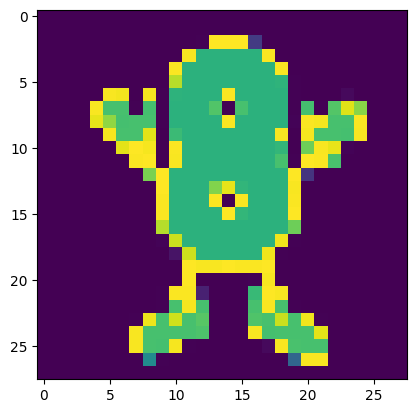

In [8]:
# Cargar datos de entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Forma de las imágenes 28 x 28 pixeles (60000)
print(x_train.shape)

# Mostrar imagen de la posición
plt.imshow(x_train[711])

# Estandarizar los valores entre 0 y 1 pixeles (0 y 255)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Cambiar forma de los datos de entrada a 28*28 y a blanco/negro
# El campo es para definir el color o b/n
# -1 -> establecer automáticamente la dimensión
# 1 -> negro
# 3 -> color
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Crear Arquitectura de la red neuronal
# Trabajamos con una red neuronal Convolucional
modelo = keras.Sequential()

# Capa convolución (#filtros, kernel, func activación, forma entrada)
capa_convolucion = Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1))

# Capa Agrupamiento (pool_size(2,2)) cada región de 2x2 pixeles en la entrada se reduce a un solo pixel
capa_agrupamiento = MaxPooling2D(pool_size=(2, 2))

# Capa aplanamiento
capa_aplanamiento = Flatten()

# Capa Densas (escondidas)
capa_oculta1 = Dense(units=64, activation="relu")
# Capa salida, depende de las salidas
capa_salida = Dense(units=10, activation="softmax")

# Compilar modelo
modelo = keras.Sequential([capa_convolucion, capa_agrupamiento, capa_aplanamiento, capa_oculta1, capa_salida])

# Pasar a categoricas (10 salidas)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Compilar el modelo
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

# Entrenando el modelo
#epochs número de veces que el modelo recorrera todo el conjunto de datos de entrenamiento
modelo.fit(x_train, y_train, epochs=5, batch_size=128)

# Evaluar el modelo con los datos de prueba
perdida = modelo.evaluate(x_test, y_test)
print("La funcion de perdida es : ", perdida[0])
print("La precision es : ", perdida[1])


# Leer una imagen del conjunto
# imagen = x_test[88]
import cv2 as cv
#imagen = cv.imread('ocho.jpg')
imagen = cv.imread('ocho.jpg')

# Aplicar un filtro de desenfoque cv.GaussianBlur(imagen,(imagen,kernel),desv_estandar)
imagen = cv.GaussianBlur(imagen,(3,3),0)

# Convertir a escala de grises
imagen = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)

# Redimensionar las imagenes a un tamaño de 28 x 28
imagen = cv.resize(imagen,(28,28), interpolation=cv.INTER_NEAREST)

# Aplicar la inversion de colores (intensidad de gris)
imagen = cv.bitwise_not(imagen)
plt.imshow(imagen)

# Agregar una dimension adicional para representar el canal del color (escala grises)
# -1 se utiliza para indicar la posicion en la que se debe agregar la nueva dimension
imagen = np.expand_dims(imagen, axis=-1)

# Agregar una dimesion adicional para representar el lote de imagenes
imagen = np.expand_dims(imagen, axis=0)

# Realizar a prediccion
prediccion = modelo.predict(imagen)
predicted_class = np.argmax(prediccion[0])
#plt.imshow(x_test[88])



# Imprimir la clase predicha
print("La imagen se clasifica como:",predicted_class)


